# Apresentação do Documento

**Projeto da Disciplina Ciência de Dados Descritiva / UFCG**


**Equipe:**

- Augusto Santos
- Gabriel Paiva Medeiros
- Wander Júnior

**Dados Utilizados:**

https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

**Descrição Geral:**

Este conjunto de dados inclui dados para estimar os níveis de obesidade em indivíduos dos países do México, Peru e Colômbia, com base em seus hábitos alimentares e condição física. Os dados contêm 17 atributos e 2111 registros, os registros são rotulados com a variável de classe NObesity (Obesity Level), que permite classificar os dados usando os valores de Peso Insuficiente, Peso Normal, Sobrepeso Nível I, Sobrepeso Nível II, Obesidade Tipo I , Obesidade Tipo II e Obesidade Tipo III.

# Análise dos níveis de obesidade com base em hábitos alimentares e em condições físicas

# Imports

In [1]:
import pandas as pd
from google.colab import files
import plotly.express as px
from google.colab import drive
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Carga dos Dados

###### The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS)

In [2]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=16oJ7PKp5_Zk2-94i9oty1SRuGy7pVfaL")
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Pré-processamento dos Dados

In [3]:
df.rename({'family_history_with_overweight': 'FHWO'}, axis=1, inplace=True)
df.head(5)

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
FHWO          0
FAVC          0
FCVC          0
NCP           0
CAEC          0
SMOKE         0
CH2O          0
SCC           0
FAF           0
TUE           0
CALC          0
MTRANS        0
NObeyesdad    0
dtype: int64

In [5]:
def transform_obeyesdad(x):
  dic = {
      'Insufficient_Weight': 0, 'Normal_Weight': 1,
      'Overweight_Level_I': 2, 'Overweight_Level_II': 3,
      'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6
  }
  
  return dic[x]

df['NObeyesdad_Num'] =  df['NObeyesdad'].apply(transform_obeyesdad)
df.head(5)

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,NObeyesdad_Num
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,1
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,1
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,2
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,3


## EDA

In [6]:
def histogram_count(df, x, title):
  fig = px.histogram(df, x=x,  title=title)
  fig.show()

histogram_count(df, 'NObeyesdad', 'NObeyesdad Count')

In [7]:
def histogram_color(df, x, color, title):
  fig = px.histogram(df, x=x, color = color, barmode='group', title=title)
  fig.show()

histogram_color(df, 'NObeyesdad', 'Gender', 'NObeyesdad vs. Gender')

In [8]:
histogram_color(df, 'NObeyesdad', 'SMOKE', 'NObeyesdad vs SMOKE')

In [9]:
histogram_color(df, 'NObeyesdad', 'CAEC', 'NObeyesdad vs Consumption Of Food Between Meals')

In [10]:
histogram_color(df, 'NObeyesdad', 'CALC', 'NObeyesdad vs Consumption Of Alcohol')

In [11]:
histogram_color(df, 'NObeyesdad', 'SCC', 'NObeyesdad vs Calories Consumption Monitoring')

In [12]:
histogram_color(df, 'NObeyesdad', 'FHWO', 'NObeyesdad vs Family History With Overweight')

In [13]:
def box_plot(df, x=None, y=None, color=None, title=None):
  fig = px.box(df, x=x, y=y, color=color, title=title, points='all')
  fig.show()

In [14]:
box_plot(df, x='NObeyesdad', y='Weight', color=None, title='Weight vs NObeyesdad')

In [15]:
box_plot(df, x='MTRANS', y='Weight', color=None, title='Weight vs Transportation Used')

## Análises

### Matriz de Correlação

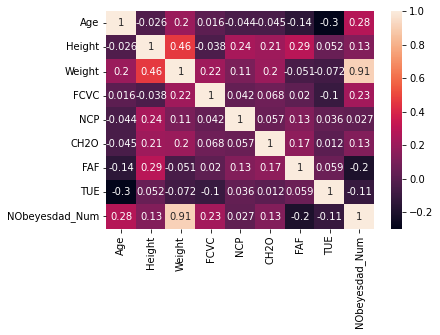

In [16]:
df_num = df[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'NObeyesdad_Num']]
corr_matrix = df_num.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [17]:
def regression(df_num, x_column, y_column):
  
  X = df_num[x_column].values.reshape(-1, 1)
  y = df_num[y_column].values

  est = LinearRegression()
  est.fit(X, y)

  y_pred = est.predict(X)

  print('MAE:', mean_absolute_error(y, y_pred))
  print('MSE:', mean_squared_error(y, y_pred))
  print('RMSE: ', mean_squared_error(y, y_pred,squared=False))
  print('R2_score: ', r2_score(y, y_pred))
  print("O coeficiente b0 eh:   {}".format(est.intercept_))
  print("O coeficiente b1 eh:   {}".format(est.coef_[0]))

In [32]:
print('==== NObeyesdad_Num | Weight ===\n')
regression(df_num, 'NObeyesdad_Num', 'Weight')

==== NObeyesdad_Num | Weight ===

MAE: 8.747691808824248
MSE: 113.79978783523151
RMSE:  10.667698338218583
R2_score:  0.8340270269255958
O coeficiente b0 eh:   49.0846046636915
O coeficiente b1 eh:   12.049553768637331


In [33]:
print('==== NObeyesdad_Num | Frequency Consumption Of Vegetables ===\n')
regression(df_num, 'NObeyesdad_Num', 'FCVC')

==== NObeyesdad_Num | Frequency Consumption Of Vegetables ===

MAE: 0.4577305834910322
MSE: 0.2701614139406291
RMSE:  0.519770539700577
R2_score:  0.051874083272853366
O coeficiente b0 eh:   2.2283829392348835
O coeficiente b1 eh:   0.061260809478715456


In [34]:
print('==== NObeyesdad_Num | Number of Meals ===\n')
regression(df_num, 'NObeyesdad_Num', 'NCP')

==== NObeyesdad_Num | Number of Meals ===

MAE: 0.5918908030948486
MSE: 0.6046263515370711
RMSE:  0.7775772318792977
R2_score:  0.0007123795433201519
O coeficiente b0 eh:   2.6530698786860425
O coeficiente b1 eh:   0.010461232738776707


In [35]:
print('==== NObeyesdad_Num | H2O Consumption ===\n')
regression(df_num, 'NObeyesdad_Num', 'CH2O')

==== NObeyesdad_Num | H2O Consumption ===

MAE: 0.47672800893726486
MSE: 0.36889029304874077
RMSE:  0.6073633945577728
R2_score:  0.017691243996936334
O coeficiente b0 eh:   1.880188173120274
O coeficiente b1 eh:   0.04107075198525135


In [36]:
print('==== NObeyesdad_Num | Activity Frequency ===\n')
regression(df_num, 'NObeyesdad_Num', 'FAF')

==== NObeyesdad_Num | Activity Frequency ===

MAE: 0.6946562248325666
MSE: 0.6942668390746812
RMSE:  0.8332267632971718
R2_score:  0.03996034397549819
O coeficiente b0 eh:   1.276884858522505
O coeficiente b1 eh:   -0.08565684936697228


In [37]:
print('==== NObeyesdad_Num | Time Using Technology Devices ===\n')
regression(df_num, 'NObeyesdad_Num', 'TUE')

==== NObeyesdad_Num | Time Using Technology Devices ===

MAE: 0.5104114483479469
MSE: 0.36629456676401495
RMSE:  0.6052227414464983
R2_score:  0.011662162988947622
O coeficiente b0 eh:   0.7609657846643986
O coeficiente b1 eh:   -0.033126911176034314


### Clustering

In [38]:
df_norm = (df_num-df_num.min())/(df_num.max()-df_num.min())

In [39]:
X = df_num.values
#clustering = DBSCAN(eps=3, min_samples=2).fit(X)
clustering = KMeans(n_clusters=7,).fit(X)

In [40]:
df_num['labels'] = clustering.labels_
df_num.head(5)

<ipython-input-40-4c5ffe1147f8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad_Num,labels
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,5
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1,6
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,2,6
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,3,6


In [41]:
histogram_color(df_num, 'NObeyesdad_Num', 'labels', 'NObeyesdad_Num vs Labels')